In [2]:
from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import copy
import os

plt.ion()   # interactive mode

In [76]:
import importlib
import ImagesPreprocess as ip
importlib.reload(ip)

<module 'ImagesPreprocess' from '/Users/romina/faceDL/ImagesPreprocess.py'>

In [77]:
from ImagesPreprocess import *

In [78]:
train_size = 70
val_size = 30
data_dict = {'train': results[:train_size], 
             'val': results[train_size:train_size+val_size]}

In [63]:
data_dict['val']

[(41255, 'image20267.jpg', 330, 65, 93, 93),
 (41257, 'image20294.jpg', 189, 99, 132, 132),
 (41261, 'image20313.jpg', 417, 871, 1720, 1720),
 (41298, 'image20637.jpg', 230, 495, 365, 365),
 (41302, 'image20662.jpg', 125, 56, 58, 58),
 (41309, 'image20705.jpg', 362, 383, 219, 219),
 (41314, 'image20738.jpg', 141, 461, 432, 432),
 (41331, 'image20849.jpg', 158, 41, 98, 98),
 (41349, 'image21002.jpg', 74, 67, 332, 332),
 (41354, 'image21066.jpg', 172, 42, 115, 115),
 (41356, 'image21076.jpg', 199, 18, 204, 204),
 (41377, 'image21346.jpg', 489, -250, 2209, 2209),
 (41402, 'image21677.jpg', 1307, 649, 597, 597),
 (41407, 'image21755.jpg', 437, 299, 70, 70),
 (41422, 'image21842.jpg', 57, 97, 218, 218),
 (41427, 'image21861.jpg', 106, 117, 108, 108),
 (41429, 'image21893.jpg', 223, 100, 111, 111),
 (41460, 'image22248.jpg', 226, 69, 171, 171),
 (41462, 'image22275.jpg', 759, 818, 669, 669),
 (41491, 'image22570.jpg', 240, 61, 89, 89),
 (41496, 'image22595.jpg', 767, 375, 2560, 2560),
 (4151

In [79]:
normalize = Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.229, 0.224, 0.225])

In [80]:
transformed_dataset_face = {x: FaceBBsDataset(data_dict[x], 
                                     root_dir=path_to_tmp,
                                    transform_pos=transforms.Compose([
                                        CropFace(),
                                        Rescale((224,224)),
                                        ToTensor(), 
                                        normalize
                                    ]),
                                    transform_neg=transforms.Compose([
                                        RandomNonFaceCrop(), 
                                        Rescale((224,224)),
                                        ToTensor(),
                                        normalize
                                    ])) for x in ['train', 'val']}
            

In [81]:
dataloader = {x: DataLoader(transformed_dataset_face[x], 
                        batch_size=4,
                       shuffle=True, num_workers=1)
              for x in ['train', 'val']}


In [82]:
list(dataloader['train'])

Exception ignored in: <bound method DataLoaderIter.__del__ of <torch.utils.data.dataloader.DataLoaderIter object at 0x12339d7b8>>
Traceback (most recent call last):
  File "/Users/romina/anaconda/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 241, in __del__
    self._shutdown_workers()
  File "/Users/romina/anaconda/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 237, in _shutdown_workers
    self.index_queue.put(None)
  File "/Users/romina/anaconda/lib/python3.6/multiprocessing/queues.py", line 355, in put
    self._writer.send_bytes(obj)
  File "/Users/romina/anaconda/lib/python3.6/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/Users/romina/anaconda/lib/python3.6/multiprocessing/connection.py", line 404, in _send_bytes
    self._send(header + buf)
  File "/Users/romina/anaconda/lib/python3.6/multiprocessing/connection.py", line 368, in _send
    n = write(self._handle, buf)
OSError: 

[{'x': 
  ( 0 , 0 ,.,.) = 
   -2.0843e+00 -2.0856e+00 -2.0922e+00  ...  -2.0553e+00 -2.0731e+00 -2.0843e+00
   -1.6906e+00 -1.7354e+00 -1.7566e+00  ...  -1.6726e+00 -1.6556e+00 -1.6904e+00
   -1.7165e+00 -1.5861e+00 -1.7669e+00  ...  -1.5753e+00 -1.6306e+00 -1.6908e+00
                   ...                   ⋱                   ...                
   -1.5600e+00 -1.5126e+00 -1.4854e+00  ...  -1.8172e+00 -1.5917e+00 -1.6732e+00
   -1.4720e+00 -1.4937e+00 -1.3947e+00  ...  -1.8089e+00 -1.5872e+00 -1.5578e+00
   -2.0620e+00 -2.0499e+00 -2.0568e+00  ...  -2.1075e+00 -2.0798e+00 -2.0673e+00
  
  ( 0 , 1 ,.,.) = 
   -1.9993e+00 -1.9984e+00 -2.0094e+00  ...  -1.9769e+00 -1.9951e+00 -2.0066e+00
   -1.5981e+00 -1.6461e+00 -1.7281e+00  ...  -1.5824e+00 -1.5650e+00 -1.6006e+00
   -1.6812e+00 -1.5615e+00 -1.7464e+00  ...  -1.5335e+00 -1.5900e+00 -1.6516e+00
                   ...                   ⋱                   ...                
   -1.4620e+00 -1.3994e+00 -1.3715e+00  ...  -1.7647e+00 -1.

0 torch.Size([4, 3, 224, 224]) torch.Size([4, 2])
1 torch.Size([4, 3, 224, 224]) torch.Size([4, 2])
2 torch.Size([4, 3, 224, 224]) torch.Size([4, 2])
3 torch.Size([4, 3, 224, 224]) torch.Size([4, 2])
4 torch.Size([4, 3, 224, 224]) torch.Size([4, 2])
5 torch.Size([4, 3, 224, 224]) torch.Size([4, 2])
6 torch.Size([4, 3, 224, 224]) torch.Size([4, 2])
7 torch.Size([4, 3, 224, 224]) torch.Size([4, 2])
8 torch.Size([4, 3, 224, 224]) torch.Size([4, 2])
9 torch.Size([4, 3, 224, 224]) torch.Size([4, 2])
10 torch.Size([4, 3, 224, 224]) torch.Size([4, 2])
11 torch.Size([4, 3, 224, 224]) torch.Size([4, 2])
12 torch.Size([4, 3, 224, 224]) torch.Size([4, 2])
13 torch.Size([4, 3, 224, 224]) torch.Size([4, 2])
14 torch.Size([4, 3, 224, 224]) torch.Size([4, 2])
15 torch.Size([4, 3, 224, 224]) torch.Size([4, 2])
16 torch.Size([4, 3, 224, 224]) torch.Size([4, 2])
17 torch.Size([4, 3, 224, 224]) torch.Size([4, 2])
18 torch.Size([4, 3, 224, 224]) torch.Size([4, 2])
19 torch.Size([4, 3, 224, 224]) torch.Siz

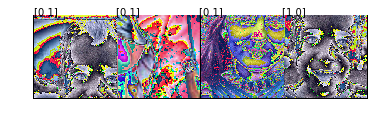

In [10]:
for i_batch, sample_batched in enumerate(dataloader['train']):
    try:
        print(i_batch, sample_batched['x'].size(),
              sample_batched['y'].size())

        # observe 4th batch and stop.
        if i_batch == 33:
            plt.figure()
            show_batch(sample_batched)
            plt.axis('off')
            plt.ioff()
            plt.show()
            break
    except:
        print('oops')

In [83]:
use_gpu = torch.cuda.is_available()
print(use_gpu)

False


In [144]:
dset_sizes = {x: len(transformed_dataset_face[x]) for x in ['train', 'val']}
dset_classes = transformed_dataset_face['train']

In [132]:
for i_batch, data in enumerate(dataloader['train']):
    try:
        inputs, labels = data['x'], data['y']
        print(inputs.shape, Variable(labels).data)
    except Exception as e: print(e)

torch.Size([4, 3, 224, 224]) 
 1
 0
 1
 1
[torch.LongTensor of size 4x1]

torch.Size([4, 3, 224, 224]) 
 1
 0
 1
 0
[torch.LongTensor of size 4x1]

torch.Size([4, 3, 224, 224]) 
 0
 0
 1
 1
[torch.LongTensor of size 4x1]

torch.Size([4, 3, 224, 224]) 
 0
 1
 1
 0
[torch.LongTensor of size 4x1]

torch.Size([4, 3, 224, 224]) 
 0
 0
 1
 1
[torch.LongTensor of size 4x1]

torch.Size([4, 3, 224, 224]) 
 0
 1
 0
 1
[torch.LongTensor of size 4x1]

torch.Size([4, 3, 224, 224]) 
 1
 0
 0
 0
[torch.LongTensor of size 4x1]

torch.Size([4, 3, 224, 224]) 
 1
 0
 1
 0
[torch.LongTensor of size 4x1]

torch.Size([4, 3, 224, 224]) 
 0
 1
 0
 1
[torch.LongTensor of size 4x1]

torch.Size([4, 3, 224, 224]) 
 0
 1
 1
 1
[torch.LongTensor of size 4x1]

torch.Size([4, 3, 224, 224]) 
 1
 1
 0
 1
[torch.LongTensor of size 4x1]

torch.Size([4, 3, 224, 224]) 
 1
 1
 1
 1
[torch.LongTensor of size 4x1]

torch.Size([4, 3, 224, 224]) 
 0
 0
 0
 1
[torch.LongTensor of size 4x1]

torch.Size([4, 3, 224, 224]) 
 1
 0
 0

In [136]:
def train_model(model, criterion, optimizer, lr_scheduler, num_epochs=2):
    since = time.time()
    best_model = model
    best_acc = 0.0
    
    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)
        
        #training and validation phases in each epoch
        for phase in ['train','val']:
            if phase == 'train':
                optimizer = lr_scheduler(optimizer, epoch)
                model.train(True) #set model to train mode
            else:
                model.train(False) #set model to evaluate mode
            
            running_loss = 0.0
            running_corrects = 0
            
            for i_batch, data in enumerate(dataloader[phase]):
                try:
                    inputs, labels = data['x'], data['y']
#                     print(inputs.shape, labels)
                    #print('i_batch', i_batch)
#                     print(inputs)
#                     print(labels)
                    if use_gpu:
                        inputs, labels = Variable(inputs.cuda()),
                        Variable(labels.cuda())
                    else:
                        inputs,labels = Variable(inputs), Variable(labels)

                    optimizer.zero_grad()

                    #forward
                    outputs = model(inputs)
                    _,preds = torch.max(outputs.data, 1)
                    #print("outputs:", outputs)
                    
                    labels=labels[:,0]
                    #print('preds:', preds)
                    #print('labels:', labels.data)
                    loss = criterion(outputs, labels)

                    #backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                    #statistics
                    running_loss += loss.data[0]
                    running_corrects += torch.sum(preds == labels.data)
                except: traceback.print_exc()
                
            epoch_loss = running_loss/dset_sizes[phase]
            epoch_acc = running_corrects / dset_sizes[phase]
            
            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))
            
            #deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model = copy.deepcopy(model)
                
        print()
        
    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed// 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))
    return best_model

In [99]:
def exp_lr_scheduler(optimizer, epoch, init_lr=0.001, lr_decay_epoch=7):
    """Decay learning rate by a factor of 0.1 every lr_decay_epoch epochs."""
    lr = init_lr * (0.1**(epoch // lr_decay_epoch))

    if epoch % lr_decay_epoch == 0:
        print('LR is set to {}'.format(lr))

    for param_group in optimizer.param_groups:
        param_group['lr'] = lr

    return optimizer

Visualizing Predictions 

In [165]:
model_conv = torchvision.models.vgg16(pretrained=True)

In [167]:
for param in model_conv.parameters():
    param.requires_grad = False

In [168]:
print(model_conv.classifier.children)

<bound method Module.children of Sequential (
  (0): Linear (25088 -> 4096)
  (1): ReLU (inplace)
  (2): Dropout (p = 0.5)
  (3): Linear (4096 -> 4096)
  (4): ReLU (inplace)
  (5): Dropout (p = 0.5)
  (6): Linear (4096 -> 1000)
)>


In [169]:
model_conv.classifier = nn.Sequential(
            nn.Linear(512 * 7 * 7, 4096),
            nn.ReLU(True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(True),
            nn.Dropout(),
            nn.Linear(4096, 2),
        )

In [170]:
criterion = nn.CrossEntropyLoss()

In [171]:
model_conv.classifier.parameters()

<generator object Module.parameters at 0x1219098e0>

In [172]:
optimizer_conv = optim.SGD(model_conv.classifier.parameters(), lr=0.001, momentum=0.9)

In [173]:
criterion

CrossEntropyLoss (
)

In [174]:
model_conv = train_model(model_conv, criterion, optimizer_conv,
                         exp_lr_scheduler, num_epochs=2)

Epoch 0/1
----------
LR is set to 0.001
train Loss: 0.1373 Acc: 0.6786
val Loss: 0.0791 Acc: 0.8667

Epoch 1/1
----------
train Loss: 0.0737 Acc: 0.8929
val Loss: 0.0674 Acc: 0.9167

Training complete in 3m 25s
Best val Acc: 0.916667


In [194]:
def visualize_model(model, num_images=3):
    images_so_far = 0
    fig = plt.figure()
    for i, data in enumerate(dataloader['val']):
        inputs, labels = data['x'], data['y']
        if use_gpu:
            inputs,labels = Variable(inputs.cuda()), Variable(labels.cuda())
        else:
            inputs, labels = Variable(inputs), Variable(labels)

        outputs = model(inputs)
        _, preds = torch.max(outputs.data, 1)

        print(inputs.size()[0])
        for j in range(inputs.size()[0]):
            images_so_far += 1
            ax = plt.subplot(num_images//2, 2, images_so_far)
            ax.axis('off')
            ax.set_title('predicted: {}, label: {}'.format(preds[j],labels.cpu().data[j][0]))
#             print(inputs.cpu().data[j].numpy().transpose(1,2,0).shape)
            plt.imshow(inputs.cpu().data[j].numpy().transpose(1,2,0))

            if images_so_far == num_images:
                return

4
4


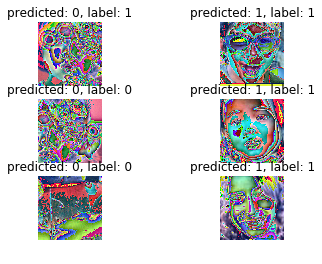

In [195]:
visualize_model(model_conv, num_images=6)

In [197]:
model_fcn = torchvision.models.vgg16(pretrained=True)
for param in model_fcn.parameters():
    param.requires_grad = False

In [198]:
print(model_fcn.classifier.children)

<bound method Module.children of Sequential (
  (0): Linear (25088 -> 4096)
  (1): ReLU (inplace)
  (2): Dropout (p = 0.5)
  (3): Linear (4096 -> 4096)
  (4): ReLU (inplace)
  (5): Dropout (p = 0.5)
  (6): Linear (4096 -> 1000)
)>


In [1]:
model_conv.classifier = nn.Sequential(
            nn.Conv2d(512, 4096, 7, stride=1, bias=False),
            nn.ReLU(True),
            nn.Dropout(),
            nn.Conv2d(4096, 4096, 1),
            nn.ReLU(True),
            nn.Dropout(),
            nn.Conv2d(4096, 2, 1),
        )

NameError: name 'nn' is not defined